Loading and preprocessing the MNIST dataset...


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step
Train images shape: (60000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)
Train labels shape: (60000,)
Test labels shape: (10000,)

Building the Convolutional Neural Network model...


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Compiling the model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.9007 - loss: 0.3309 - val_accuracy: 0.9801 - val_loss: 0.0587
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9845 - loss: 0.0495 - val_accuracy: 0.9900 - val_loss: 0.0283
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9904 - loss: 0.0311 - val_accuracy: 0.9885 - val_loss: 0.0337
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9916 - loss: 0.0249 - val_accuracy: 0.9907 - val_loss: 0.0316
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9940 - loss: 0.0186 - val_accuracy: 0.9912 - val_loss: 0.0278

Evaluating the model on the test set...
313/313 - 2s - 6ms/step - accuracy: 0.9912 - loss: 0.0278

Test accuracy: 0.9912

Plotting training history...


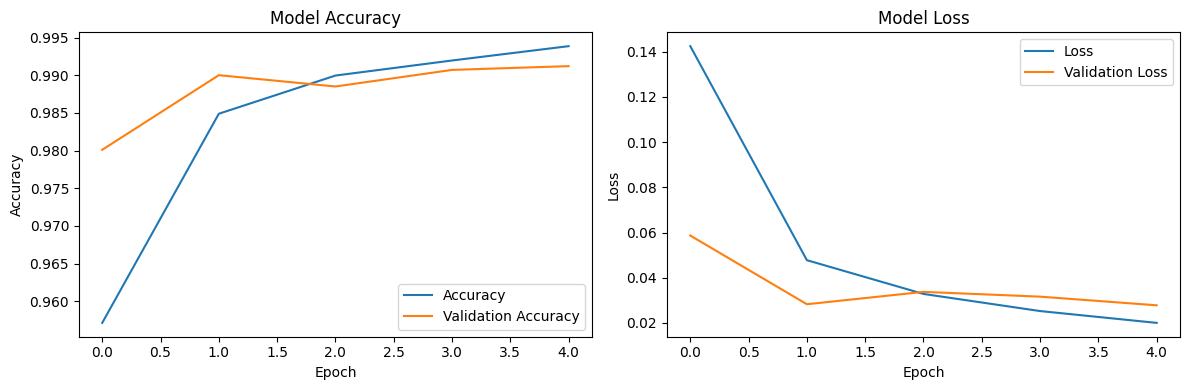


Making predictions on a few test images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

Original Labels vs. Predicted Labels:
Image 1: True Label = 7, Predicted Label = 7
Image 2: True Label = 2, Predicted Label = 2
Image 3: True Label = 1, Predicted Label = 1
Image 4: True Label = 0, Predicted Label = 0
Image 5: True Label = 4, Predicted Label = 4


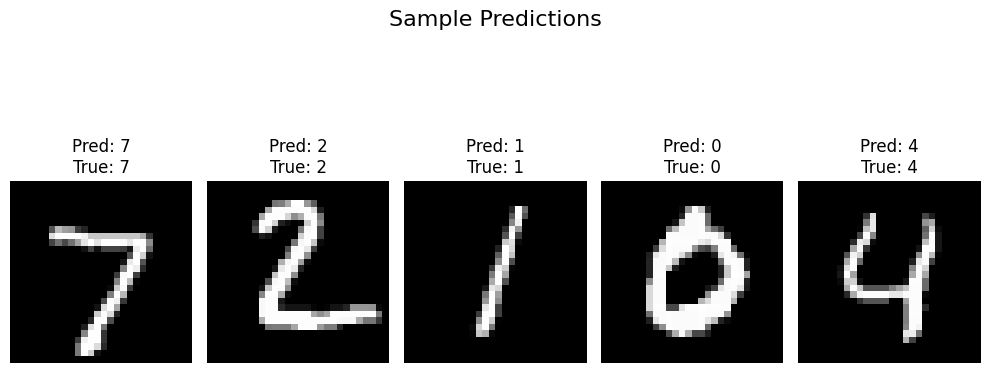

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load and Preprocess the Dataset ---
print("Loading and preprocessing the MNIST dataset...")

# Load the MNIST dataset
# MNIST contains 60,000 training images and 10,000 test images of handwritten digits (0-9).
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape images to add a channel dimension (for CNN input)
# CNNs typically expect input in the format (batch_size, height, width, channels).
# For grayscale images, channels = 1.
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
# This helps the model learn more effectively.
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test labels shape: {test_labels.shape}")

# --- 2. Build the CNN Model ---
print("\nBuilding the Convolutional Neural Network model...")

model = models.Sequential([
    # Convolutional Layer 1
    # filters: Number of output filters in the convolution.
    # kernel_size: Height and width of the 2D convolution window.
    # activation: Activation function (ReLU is common for hidden layers).
    # input_shape: Specifies the shape of the input data for the first layer.
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max Pooling Layer 1
    # pool_size: Factors by which to downsample (vertical, horizontal).
    # Reduces the spatial dimensions (e.g., 28x28 -> 14x14).
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Max Pooling Layer 2
    # Reduces the spatial dimensions further (e.g., 14x14 -> 7x7).
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3 (Optional, but often improves performance)
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten Layer
    # Flattens the 3D output of the convolutional layers into a 1D vector.
    # This prepares the data for the fully connected (Dense) layers.
    layers.Flatten(),

    # Dense (Fully Connected) Layer 1
    # units: Number of neurons in the layer.
    layers.Dense(64, activation='relu'),

    # Output Layer
    # units: 10 because we have 10 digit classes (0-9).
    # activation: 'softmax' for multi-class classification, outputs probabilities for each class.
    layers.Dense(10, activation='softmax')
])

# --- 3. Compile the Model ---
print("\nCompiling the model...")

model.compile(optimizer='adam', # Adam is a popular and effective optimizer.
              loss='sparse_categorical_crossentropy', # Suitable for integer labels (0, 1, ..., 9).
              metrics=['accuracy']) # Metric to monitor during training.

# Print a summary of the model architecture
model.summary()

# --- 4. Train the Model ---
print("\nTraining the model...")

history = model.fit(train_images, train_labels,
                    epochs=5, # Number of times to iterate over the entire training dataset.
                    validation_data=(test_images, test_labels)) # Data to evaluate on after each epoch.

# --- 5. Evaluate the Model ---
print("\nEvaluating the model on the test set...")

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# --- 6. Visualize Training History ---
print("\nPlotting training history...")

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# --- 7. Make Predictions (Optional) ---
print("\nMaking predictions on a few test images...")

predictions = model.predict(test_images[:5]) # Predict on the first 5 test images

print("\nOriginal Labels vs. Predicted Labels:")
for i in range(5):
    print(f"Image {i+1}: True Label = {test_labels[i]}, Predicted Label = {np.argmax(predictions[i])}")

# Visualize the first few test images with their predicted labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {test_labels[i]}")
    plt.axis('off')
plt.suptitle("Sample Predictions", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()